Employee Attrition Prediction 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


In [13]:
data.columns

Index(['Id', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

In [6]:
data.shape

(1628, 29)

In [7]:
#get the datatypes of columns
data.dtypes

Id                          int64
Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [14]:
# check for empty values
data.isna().sum()

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

In [17]:
# differentiate numeric and categorical columns
cat_cols= [c for c in data.columns if data[c].dtype==object]
num_cols= [c for c in data.columns if data[c].dtype!=object]

In [18]:
print(cat_cols)
print(num_cols)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
['Id', 'Age', 'Attrition', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill', 'Behaviour']


In [19]:
# Looks like no empty value- doa double check for null values
data.isnull().values.any()

False

In [20]:
# check for statistics
data.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,2.761671,15.207617,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,2.549995,3.686703,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,1.000000,12.000000,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,2.000000,14.000000,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,4.000000,18.000000,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


In [11]:
# Just from these statistics we can see that ID & Behaviour are redundant columns

In [21]:
# print all of the data types and their unique values
for column in num_cols:
    if data[column].unique().size<10:
        print(str(column)+' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print('_____________________________________________________________')

Attrition : [0 1]
0    843
1    785
Name: Attrition, dtype: int64
_____________________________________________________________
Education : [3 4 1 2 5]
3    644
4    434
2    306
1    201
5     43
Name: Education, dtype: int64
_____________________________________________________________
EnvironmentSatisfaction : [3 1 2 4]
3    480
4    472
1    372
2    304
Name: EnvironmentSatisfaction, dtype: int64
_____________________________________________________________
JobInvolvement : [3 2 4 1]
3    925
2    447
4    130
1    126
Name: JobInvolvement, dtype: int64
_____________________________________________________________
JobSatisfaction : [4 3 2 1]
3    529
4    434
1    356
2    309
Name: JobSatisfaction, dtype: int64
_____________________________________________________________
PerformanceRating : [3 4]
3    1375
4     253
Name: PerformanceRating, dtype: int64
_____________________________________________________________
StockOptionLevel : [0 2 1 3]
0    836
1    557
2    135
3    100


In [22]:
data= data.drop(['Id','Behaviour'],axis=1)

In [27]:
num_cols= [c for c in data.columns if data[c].dtype != object]

In [23]:
# Get a count of no. of employees that stayed and left the company
data['Attrition'].value_counts()

0    843
1    785
Name: Attrition, dtype: int64

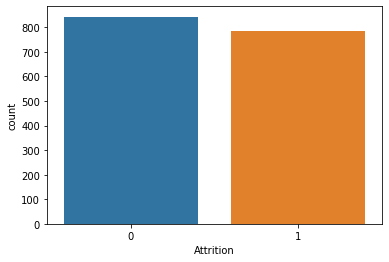

In [24]:
# using visualizations
sns.countplot(data['Attrition'])

In [16]:
# we can see we have almost 50% distribution so our model would not be skewed towards one result

In [25]:
import matplotlib.pyplot as plt


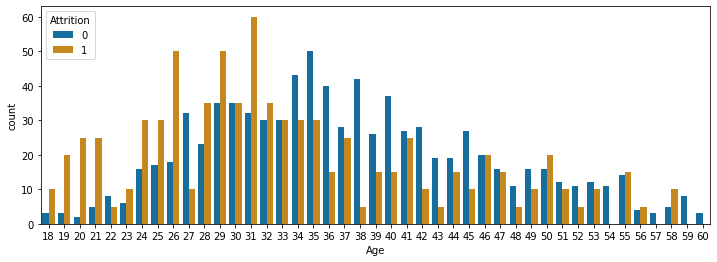

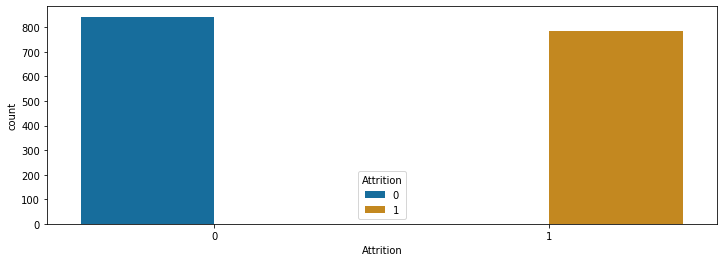

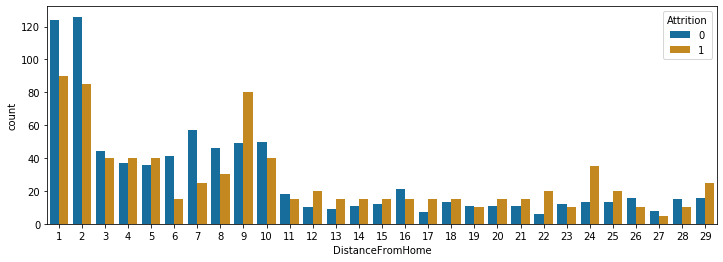

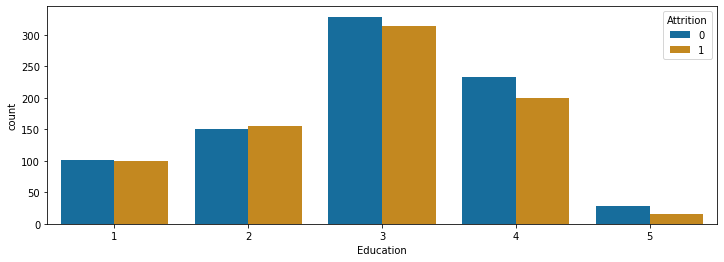

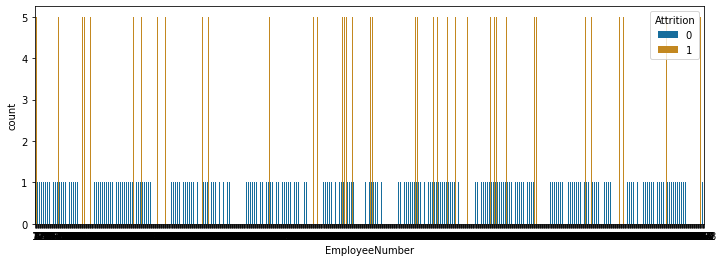

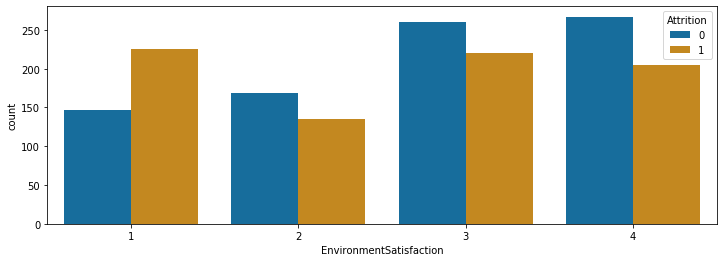

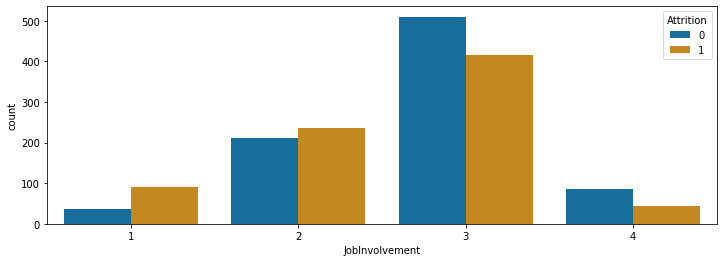

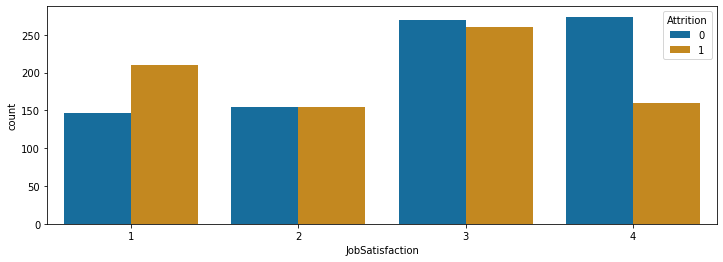

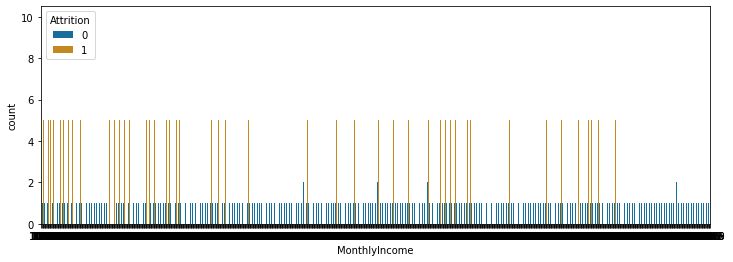

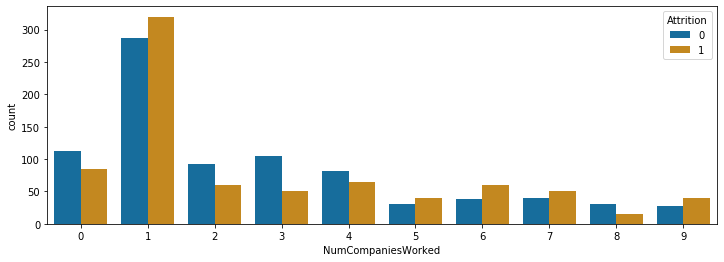

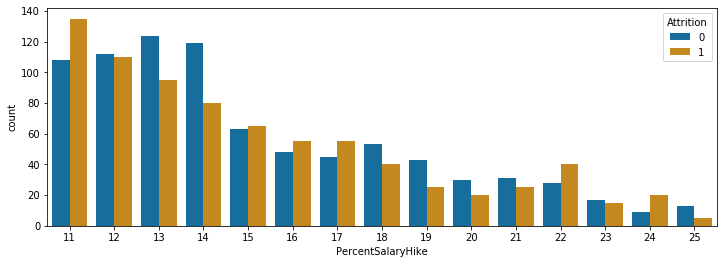

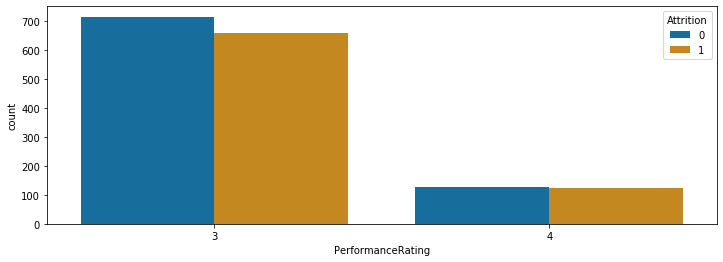

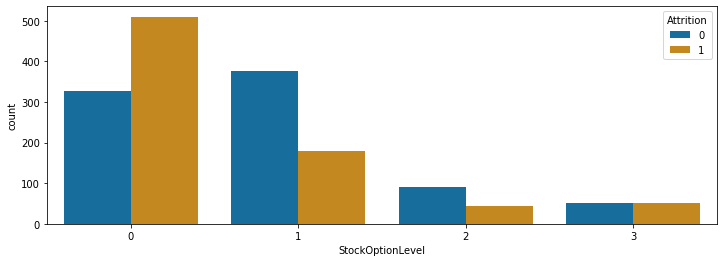

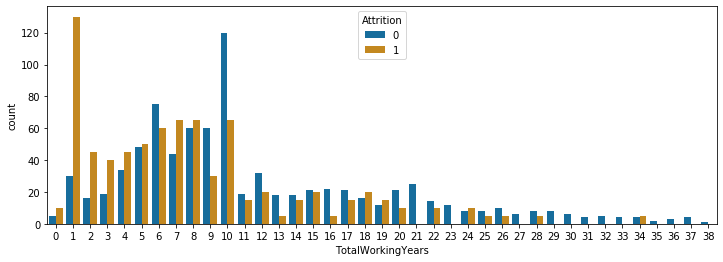

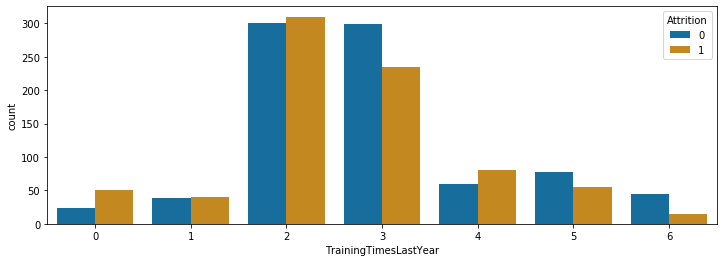

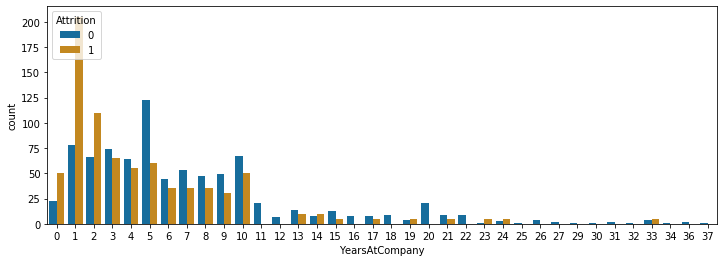

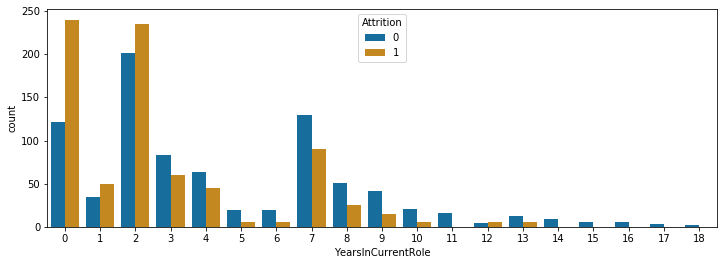

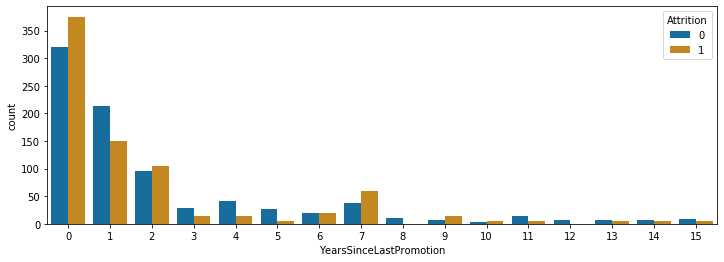

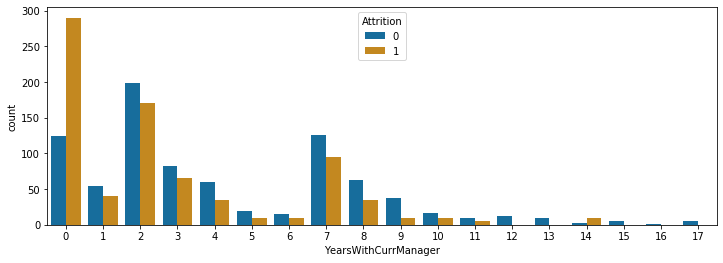

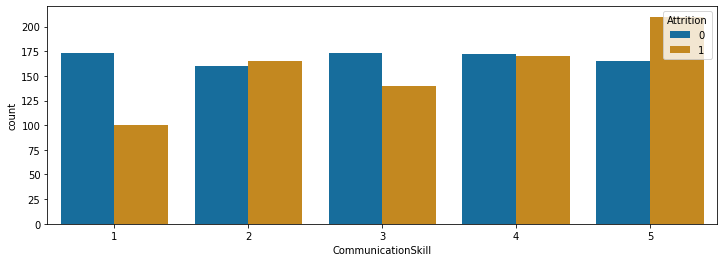

In [28]:
for col in num_cols:
    # distribution (Attrition)
    plt.subplots(figsize=(12,4))
    sns.countplot(x=col, hue='Attrition',data=data,palette='colorblind')

In [ ]:
# Insights drawn from visualization-
# 1. People of age group 25-35 are more likely to leave the company as they are freshers.
# 2. Distance from home has an opposite trend wrt Attrition. 
# 3. Higher Educated people are less likely to leave the company.
# 4. Employee number is redudant for attrition.
# 5. People with high Environment satisfaction are also likely to leave the company.
# 6. People with High job involvement are likely to leave the company. This can be due to work overload.
# 7. People with high job satisfaction are also likely to leave the company.
# 8. Attrition decreases with number of companies worked as people look for settlement.
# 9. People with less Salary hike are likely to leave the company which is a valid reason.
# 10. People with high performance rating are also likely to leave the company which will result in loss for the company as 
# they have to spend more money and time on new employees
# 11. People with no stocks are likely to leave the company which shows that they require more incentives from the company.
# 12. People with high communication skills are also likely to leave the company. 

In [29]:
data=data.drop('EmployeeNumber',axis=1)

In [31]:
num_cols.remove('EmployeeNumber')

In [33]:
# print all of the data types and their unique values
for column in cat_cols:
    print(str(column)+' : ' + str(data[column].unique()))
    print(data[column].value_counts())
    print('_____________________________________________________________')

BusinessTravel : ['Non-Travel' 'Travel_Rarely' 'Travel_Frequently']
Travel_Rarely        1105
Travel_Frequently     403
Non-Travel            120
Name: BusinessTravel, dtype: int64
_____________________________________________________________
Department : ['Research & Development' 'Sales' 'Human Resources']
Research & Development    979
Sales                     568
Human Resources            81
Name: Department, dtype: int64
_____________________________________________________________
EducationField : ['Medical' 'Life Sciences' 'Other' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       623
Medical             521
Marketing           197
Technical Degree    162
Other                85
Human Resources      40
Name: EducationField, dtype: int64
_____________________________________________________________
Gender : ['Female' 'Male']
Male      996
Female    632
Name: Gender, dtype: int64
_____________________________________________________________
JobRole : ['Laborato

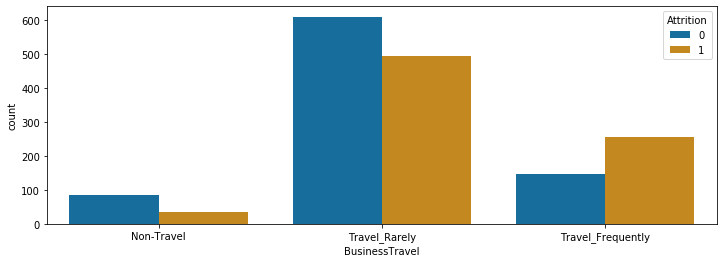

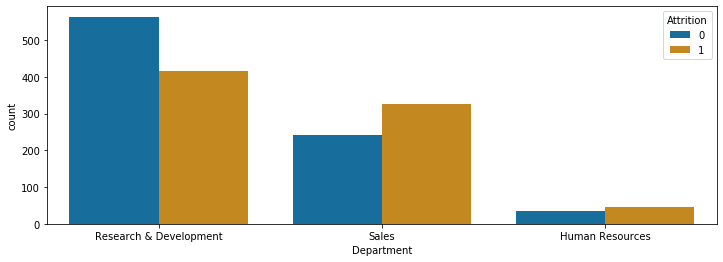

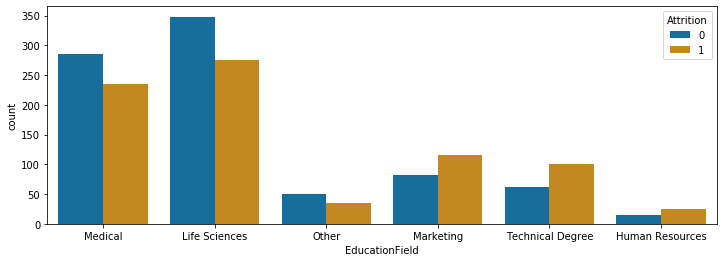

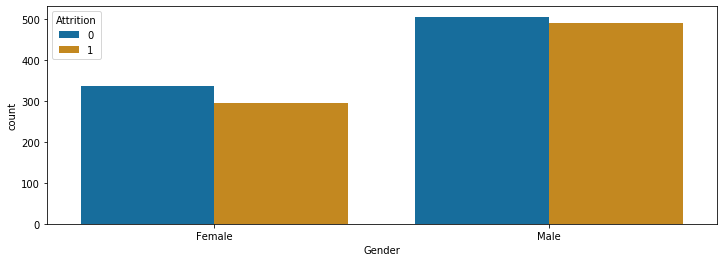

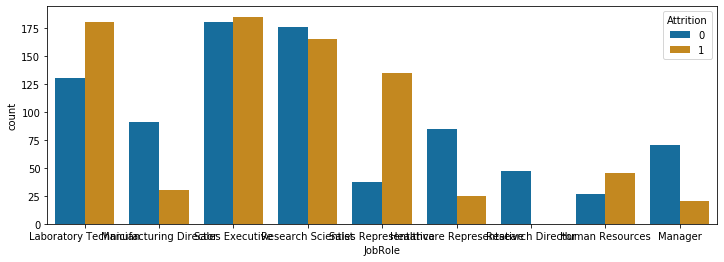

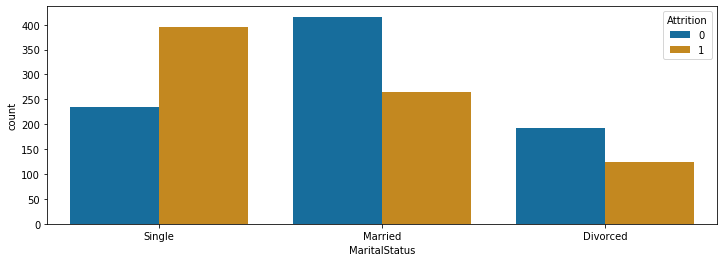

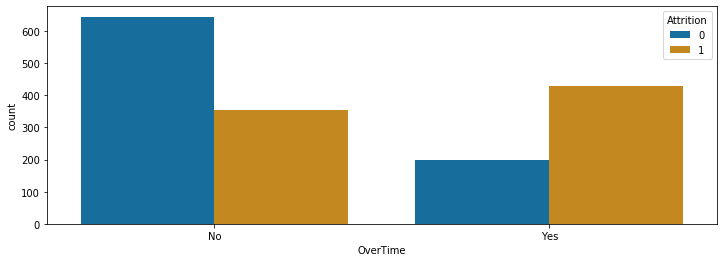

In [34]:
for col in cat_cols:
    # distribution (Attrition)
    plt.subplots(figsize=(12,4))
    sns.countplot(x=col, hue='Attrition',data=data,palette='colorblind')

In [35]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,30,0,Non-Travel,Research & Development,2,3,Medical,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4
1,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2
2,55,1,Travel_Rarely,Sales,2,1,Medical,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5
3,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4
4,37,0,Travel_Rarely,Research & Development,3,3,Other,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1


In [36]:
# Get the correlation
data.corr()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
Age,1.000000,-0.200596,0.020658,0.219237,0.001950,0.073185,0.037604,0.509210,0.312099,0.034546,0.002982,0.126257,0.675578,0.004789,0.355438,0.266728,0.222113,0.263792,0.019341
Attrition,-0.200596,1.000000,0.109224,-0.041390,-0.111746,-0.159710,-0.148012,-0.240479,0.034763,-0.012668,0.010202,-0.175496,-0.262922,-0.105663,-0.230061,-0.269408,-0.050379,-0.222752,0.103379
DistanceFromHome,0.020658,0.109224,1.000000,0.023945,-0.046390,0.016316,-0.097558,0.012521,-0.048131,0.103452,0.071457,0.029378,0.029289,-0.032038,-0.030392,-0.010607,0.004460,-0.004135,-0.036109
Education,0.219237,-0.041390,0.023945,1.000000,-0.065041,0.083673,-0.036143,0.119907,0.091690,0.013565,-0.036204,0.042585,0.175662,-0.043272,0.145911,0.076579,0.076430,0.121981,0.000223
EnvironmentSatisfaction,0.001950,-0.111746,-0.046390,-0.065041,1.000000,-0.000977,0.035033,-0.033990,-0.051681,-0.032655,-0.041427,-0.006479,-0.019005,0.020531,0.000685,0.008028,0.014325,0.002457,-0.011557
JobInvolvement,0.073185,-0.159710,0.016316,0.083673,-0.000977,1.000000,-0.005453,0.005859,0.012240,-0.042988,-0.063512,0.061673,0.037145,-0.027122,-0.008208,0.029460,0.006373,0.062552,0.052877
JobSatisfaction,0.037604,-0.148012,-0.097558,-0.036143,0.035033,-0.005453,1.000000,0.003255,-0.032738,-0.077425,-0.078554,0.024867,0.012892,-0.012757,0.023714,0.036065,0.004439,-0.006131,-0.051464
MonthlyIncome,0.509210,-0.240479,0.012521,0.119907,-0.033990,0.005859,0.003255,1.000000,0.169025,-0.017738,-0.037533,0.012281,0.759658,-0.020173,0.536715,0.418501,0.340080,0.401007,-0.060311
NumCompaniesWorked,0.312099,0.034763,-0.048131,0.091690,-0.051681,0.012240,-0.032738,0.169025,1.000000,0.015858,-0.015765,0.069008,0.226706,-0.043610,-0.099854,-0.081803,-0.046999,-0.116915,0.013289
PercentSalaryHike,0.034546,-0.012668,0.103452,0.013565,-0.032655,-0.042988,-0.077425,-0.017738,0.015858,1.000000,0.785024,0.025835,0.006266,0.008500,0.002299,0.029127,-0.036528,0.020399,0.004156


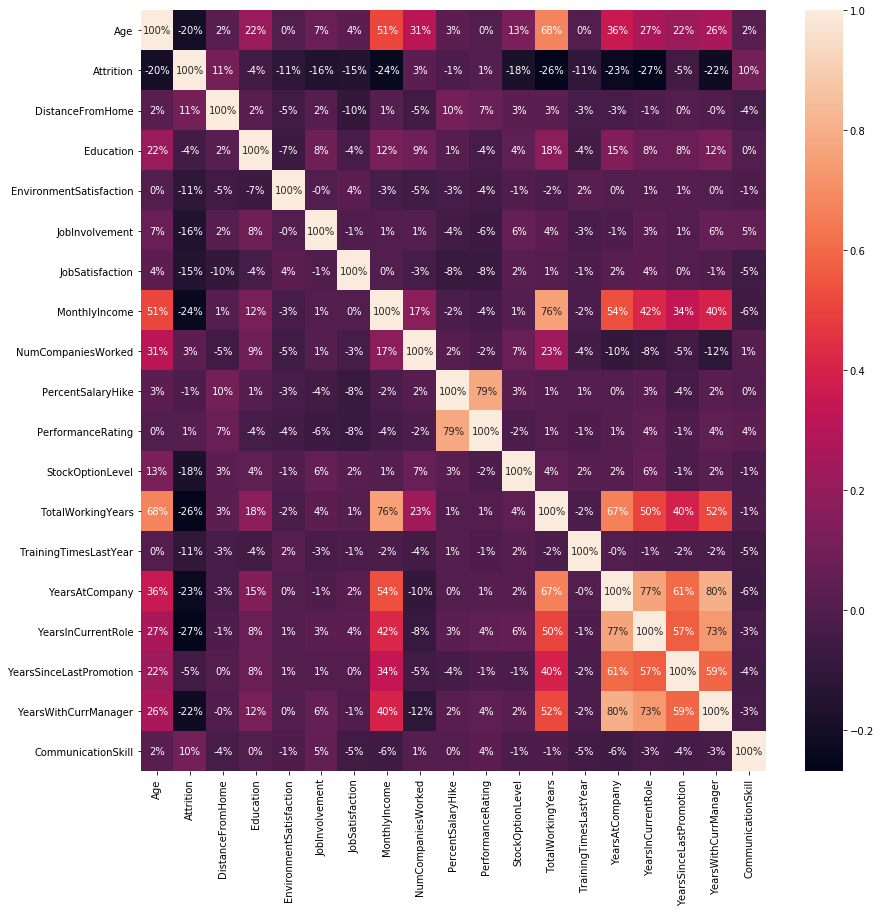

In [37]:
# Visualize correlation
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(),annot=True,fmt='.0%') #nothing behind decimal

In [24]:
# Transform the data
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4
1,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2
2,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5
3,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4
4,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1


In [58]:
# Non numeric col into numeric colns and delete unnecessary cols
for col in cat_cols:
    dummy= pd.get_dummies(data[col])
    delete= dummy.columns[dummy.columns.size-1]
    dummy=dummy.drop(delete,axis=1)
    data= pd.concat([data,dummy],axis=1)
    data=data.drop(col,axis=1)

In [65]:
data.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Non-Travel,Travel_Frequently,Human Resources,Research & Development,Human Resources,Life Sciences,Marketing,Medical,Other,Female,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Divorced,Married,No
0,30,0,2,3,3,3,4,2564,0,14,3,0,12,2,11,7,6,7,4,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
1,36,0,12,4,3,3,3,4663,9,12,3,2,7,2,3,2,1,1,2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,55,1,2,1,3,3,4,5160,4,16,3,0,12,3,9,7,7,3,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,39,0,24,1,1,3,4,4108,7,13,3,0,18,2,7,7,1,7,4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,37,0,3,3,3,3,3,9434,1,15,3,1,10,2,10,7,7,8,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1


In [60]:
data.describe()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Non-Travel,Travel_Frequently,Human Resources,Research & Development,Human Resources,Life Sciences,Marketing,Medical,Other,Female,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Divorced,Married,No
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000
mean,35.645577,0.482187,9.735258,2.884521,2.646192,2.650491,2.639435,5785.524570,2.761671,15.207617,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,0.073710,0.247543,0.049754,0.601351,0.024570,0.382678,0.121007,0.320025,0.052211,0.388206,0.067568,0.044226,0.190418,0.055283,0.074324,0.028870,0.209459,0.224201,0.194717,0.418305,0.614251
std,9.481794,0.499836,8.306546,1.020470,1.125283,0.736330,1.096272,4339.293147,2.549995,3.686703,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.261379,0.431717,0.217504,0.489771,0.154858,0.486190,0.326236,0.466629,0.222521,0.487492,0.251079,0.205660,0.392751,0.228601,0.262379,0.167492,0.407048,0.417184,0.396105,0.493432,0.486921
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2625.000000,1.000000,12.000000,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,0.000000,8.000000,3.000000,3.000000,3.000000,3.000000,4304.000000,2.000000,14.000000,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,42.000000,1.000000,15.000000,4.000000,4.000000,3.000000,4.000000,7124.250000,4.000000,18.000000,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,60.000000,1.000000,29.000000,5.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
X= data.drop('Attrition',axis=1)
Y=data['Attrition']

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_m= MinMaxScaler()
scaler_s= StandardScaler()

In [72]:
X1= scaler_m.fit_transform(X)
X2= scaler_s.fit_transform(X)
X1= pd.DataFrame(X1,columns=X.columns)
X2= pd.DataFrame(X2,columns=X.columns)

In [73]:
X1.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Non-Travel,Travel_Frequently,Human Resources,Research & Development,Human Resources,Life Sciences,Marketing,Medical,Other,Female,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Divorced,Married,No
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000
mean,0.420133,0.311973,0.471130,0.548731,0.550164,0.546478,0.251528,0.306852,0.300544,0.155405,0.230753,0.261816,0.458743,0.164669,0.200826,0.136609,0.208917,0.533937,0.073710,0.247543,0.049754,0.601351,0.024570,0.382678,0.121007,0.320025,0.052211,0.388206,0.067568,0.044226,0.190418,0.055283,0.074324,0.028870,0.209459,0.224201,0.194717,0.418305,0.614251
std,0.225757,0.296662,0.255117,0.375094,0.245443,0.365424,0.228504,0.283333,0.263336,0.362402,0.288269,0.196919,0.214672,0.160032,0.193392,0.209219,0.205551,0.352193,0.261379,0.431717,0.217504,0.489771,0.154858,0.486190,0.326236,0.466629,0.222521,0.487492,0.251079,0.205660,0.392751,0.228601,0.262379,0.167492,0.407048,0.417184,0.396105,0.493432,0.486921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.261905,0.035714,0.250000,0.333333,0.333333,0.333333,0.085097,0.111111,0.071429,0.000000,0.000000,0.131579,0.333333,0.054054,0.055556,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.380952,0.250000,0.500000,0.666667,0.666667,0.666667,0.173512,0.222222,0.214286,0.000000,0.000000,0.210526,0.500000,0.135135,0.111111,0.066667,0.117647,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.571429,0.500000,0.750000,1.000000,0.666667,1.000000,0.322025,0.444444,0.500000,0.000000,0.333333,0.342105,0.500000,0.216216,0.388889,0.133333,0.411765,0.750000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
X2.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Non-Travel,Travel_Frequently,Human Resources,Research & Development,Human Resources,Life Sciences,Marketing,Medical,Other,Female,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Divorced,Married,No
0,-0.595595,-0.931510,0.113197,0.314514,0.474809,1.241465,-0.742636,-1.083343,-0.327661,-0.428952,-0.800724,0.274172,-0.584370,0.829018,0.972745,1.259309,0.987149,0.613667,3.544949,-0.573567,-0.228822,0.8142,-0.15871,-0.787338,-0.371034,1.457656,-0.234707,1.255368,-0.269191,-0.21511,2.061944,-0.241904,-0.283358,-0.172418,-0.514740,-0.537582,-0.491732,-0.848005,0.792465
1,0.037391,0.272729,1.093440,0.314514,0.474809,0.329002,-0.258768,2.447160,-0.870318,-0.428952,1.512637,-0.394220,-0.584370,-0.522482,-0.464044,-0.334406,-0.730427,-0.806447,-0.282091,-0.573567,-0.228822,0.8142,-0.15871,1.270103,-0.371034,-0.686033,-0.234707,1.255368,-0.269191,-0.21511,-0.484979,-0.241904,3.529100,-0.172418,-0.514740,-0.537582,-0.491732,1.179238,-1.261886
2,2.041847,-0.931510,-1.847287,0.314514,0.474809,1.241465,-0.144198,0.485769,0.214996,-0.428952,-0.800724,0.274172,0.192246,0.491143,0.972745,1.578052,-0.157902,1.323724,-0.282091,-0.573567,-0.228822,-1.2282,-0.15871,-0.787338,-0.371034,1.457656,-0.234707,-0.796579,-0.269191,-0.21511,-0.484979,-0.241904,-0.283358,-0.172418,-0.514740,1.860181,-0.491732,-0.848005,0.792465
3,0.353884,1.717817,-1.847287,-1.463364,0.474809,1.241465,-0.386708,1.662604,-0.598989,-0.428952,-0.800724,1.076243,-0.584370,0.153268,0.972745,-0.334406,0.987149,0.613667,-0.282091,-0.573567,-0.228822,0.8142,-0.15871,1.270103,-0.371034,-0.686033,-0.234707,-0.796579,-0.269191,-0.21511,-0.484979,-0.241904,-0.283358,-0.172418,1.942728,-0.537582,-0.491732,-0.848005,0.792465
4,0.142888,-0.811087,0.113197,0.314514,0.474809,0.329002,0.841058,-0.691065,-0.056332,-0.428952,0.355956,0.006815,-0.584370,0.660081,0.972745,1.578052,1.273412,-1.516504,-0.282091,-0.573567,-0.228822,0.8142,-0.15871,-0.787338,-0.371034,-0.686033,4.260627,-0.796579,-0.269191,-0.21511,-0.484979,-0.241904,3.529100,-0.172418,-0.514740,-0.537582,-0.491732,1.179238,0.792465


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x1_train,x1_valid,y1_train,y1_valid= train_test_split(X1,Y,test_size=0.3,random_state=42)

In [79]:
x2_train,x2_valid,y2_train,y2_valid= train_test_split(X2,Y,test_size=0.3,random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [81]:
# For MinMax Scaling
lg1= LogisticRegression()
dtc1= DecisionTreeClassifier()
rfc1= RandomForestClassifier()

In [82]:
lg1.fit(x1_train,y1_train)
dtc1.fit(x1_train,y1_train)
rfc1.fit(x1_train,y1_train)
y1_lg= lg1.predict(x1_valid)
y1_dtc=dtc1.predict(x1_valid)
y1_rfc=rfc1.predict(x1_valid)
print("lg score : ", roc_auc_score(y1_valid,y1_lg))
print("dtc score : ", roc_auc_score(y1_valid,y1_dtc))
print("rfc score : ", roc_auc_score(y1_valid,y1_rfc))

lg score :  0.7764203117144293
dtc score :  0.919607843137255
rfc score :  0.9725490196078431


In [83]:
# for standard scaling
lg2= LogisticRegression()
dtc2= DecisionTreeClassifier()
rfc2= RandomForestClassifier()
lg2.fit(x2_train,y2_train)
dtc2.fit(x2_train,y2_train)
rfc2.fit(x2_train,y2_train)
y2_lg= lg2.predict(x2_valid)
y2_dtc=dtc2.predict(x2_valid)
y2_rfc=rfc2.predict(x2_valid)
print("lg score : ", roc_auc_score(y2_valid,y2_lg))
print("dtc score : ", roc_auc_score(y2_valid,y2_dtc))
print("rfc score : ", roc_auc_score(y2_valid,y2_rfc))

lg score :  0.7864002011060834
dtc score :  0.9254901960784313
rfc score :  0.9725490196078431


In [86]:
# We will use Standard scaling and Random Forest Classifier
n_estimators=[10,50,100,300,500,1000]
for n in n_estimators:
    rfc2= RandomForestClassifier(n_estimators=n)
    rfc2.fit(x2_train,y2_train)
    y2_rfc=rfc2.predict(x2_valid)
    print("rfc score : ", roc_auc_score(y2_valid,y2_rfc), " for n= ",n)

rfc score :  0.9333584715937657  for n=  10
rfc score :  0.9764705882352941  for n=  50
rfc score :  0.9705882352941176  for n=  100
rfc score :  0.9764705882352941  for n=  300
rfc score :  0.9705882352941176  for n=  500
rfc score :  0.9745098039215686  for n=  1000


In [103]:
model= RandomForestClassifier(n_estimators=300)
model.fit(X2,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
# Import test file and perform operations
x_test= pd.read_csv('test.csv')

In [89]:
x_test.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,3,Research Scientist,4,Married,2070,1,No,23,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,4,Sales Executive,4,Divorced,5460,4,No,22,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,4,Research Scientist,1,Divorced,5974,4,Yes,13,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,2,Manufacturing Director,4,Married,6062,9,Yes,13,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,3,Laboratory Technician,2,Married,4447,1,No,12,3,0,9,5,9,7,0,8,2,1


In [90]:
ID=x_test['Id']
x_test=x_test.drop(['Id','Behaviour'],axis=1)

In [91]:
x_test=x_test.drop('EmployeeNumber',axis=1)
for col in cat_cols:
    dummy= pd.get_dummies(x_test[col])
    delete= dummy.columns[dummy.columns.size-1]
    dummy=dummy.drop(delete,axis=1)
    x_test= pd.concat([x_test,dummy],axis=1)
    x_test=x_test.drop(col,axis=1)

In [92]:
x_test.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Non-Travel,Travel_Frequently,Human Resources,Research & Development,Human Resources,Life Sciences,Marketing,Medical,Other,Female,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Divorced,Married,No
0,28,9,3,4,3,4,2070,1,23,4,1,5,3,5,2,0,4,5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
1,31,6,4,1,4,4,5460,4,22,4,2,13,4,7,7,5,7,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1
2,37,6,3,3,4,1,5974,4,13,3,2,13,2,7,7,6,7,4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,42,1,2,4,2,4,6062,9,13,3,1,8,4,4,3,0,2,5,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,45,4,2,3,3,2,4447,1,12,3,0,9,5,9,7,0,8,2,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1


In [93]:
x_test_scaled= scaler_s.fit_transform(x_test)
x_test= pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [94]:
x_test.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Non-Travel,Travel_Frequently,Human Resources,Research & Development,Human Resources,Life Sciences,Marketing,Medical,Other,Female,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Divorced,Married,No
0,-0.984052,-0.036357,0.083815,1.186278,0.362264,1.148709,-0.949816,-0.664433,2.125004,2.332028,0.234048,-0.817865,0.229579,-0.351227,-0.647214,-0.692604,-0.074816,1.380477,-0.375202,-0.446071,-0.199557,0.704851,-0.122958,-0.871952,-0.360288,1.608660,-0.237023,-0.831052,-0.309146,-0.187729,-0.496673,-0.251691,-0.337260,-0.2748,2.159317,-0.54949,-0.552771,1.141894,0.624926
1,-0.656422,-0.407833,1.068640,-1.569326,1.735359,1.148709,-0.236645,0.529007,1.854339,2.332028,1.404289,0.206510,1.022978,-0.011912,0.798559,0.837114,0.782826,-0.036170,-0.375202,-0.446071,-0.199557,-1.418739,-0.122958,-0.871952,-0.360288,1.608660,-0.237023,-0.831052,-0.309146,-0.187729,-0.496673,-0.251691,-0.337260,-0.2748,-0.463109,1.81987,1.809068,-0.875738,0.624926
2,-0.001162,-0.407833,0.083815,0.267743,1.735359,-1.489206,-0.128513,0.529007,-0.581641,-0.428811,1.404289,0.206510,-0.563819,-0.011912,0.798559,1.143058,0.782826,0.672153,-0.375202,-0.446071,-0.199557,0.704851,-0.122958,-0.871952,-0.360288,1.608660,-0.237023,-0.831052,-0.309146,-0.187729,-0.496673,-0.251691,-0.337260,-0.2748,2.159317,-0.54949,1.809068,-0.875738,-1.600189
3,0.544888,-1.026959,-0.901010,1.186278,-1.010832,1.148709,-0.110000,2.518073,-0.581641,-0.428811,0.234048,-0.433725,1.022978,-0.520885,-0.358060,-0.692604,-0.646576,1.380477,-0.375202,-0.446071,-0.199557,0.704851,-0.122958,1.146853,-0.360288,-0.621635,-0.237023,1.203294,-0.309146,-0.187729,-0.496673,-0.251691,2.965074,-0.2748,-0.463109,-0.54949,-0.552771,1.141894,-1.600189
4,0.872518,-0.655483,-0.901010,0.267743,0.362264,-0.609901,-0.449755,-0.664433,-0.852305,-0.428811,-0.936193,-0.305678,1.816376,0.327403,0.798559,-0.692604,1.068706,-0.744493,2.665229,-0.446071,-0.199557,0.704851,-0.122958,1.146853,-0.360288,-0.621635,-0.237023,-0.831052,-0.309146,-0.187729,2.013396,-0.251691,-0.337260,-0.2748,-0.463109,-0.54949,-0.552771,1.141894,0.624926


In [104]:
y_pred=model.predict(x_test)

In [105]:
y_pred=pd.DataFrame(y_pred,columns=['Attrition'])

In [106]:
submission= pd.concat([ID,y_pred],axis=1)

In [107]:
submission.head()

,Id,Attrition
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [108]:
submission.to_csv('submission.csv',index=False)

In [111]:
model2= LogisticRegression()
model2.fit(X2,Y)
y2_pred=model2.predict(x_test)
y2_pred=pd.DataFrame(y2_pred,columns=['Attrition'])
submission2= pd.concat([ID,y2_pred],axis=1)
submission2.to_csv('submission2.csv',index=False)

In [112]:
model3= DecisionTreeClassifier()
model3.fit(X2,Y)
y3_pred=model3.predict(x_test)
y3_pred=pd.DataFrame(y3_pred,columns=['Attrition'])
submission3= pd.concat([ID,y3_pred],axis=1)
submission3.to_csv('submission3.csv',index=False)